In [2]:
from tensorflow.keras import losses, models, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from tensorflow.keras.layers import (Convolution2D, Dense, Dropout, GlobalAveragePooling2D, 
                              GlobalMaxPool2D, Input, MaxPool2D, concatenate, Activation,  
                              MaxPooling2D,Flatten,BatchNormalization, Conv2D,AveragePooling2D)
from tensorflow.keras.utils import Sequence, to_categorical
from sklearn.datasets import load_iris 
from sklearn.datasets import make_moons 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import utils
from matplotlib import pyplot as plt

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

data = pd.read_csv("../input/horse-colic/horse.csv", sep=',', nrows=299)
is_null = pd.isnull(data).sum()
print('The number of empty values by column:')
print(is_null)

The number of empty values by column:
surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64


Використовуйте приклади та розв’язання лабораторних робіт 1–3 для попереднього аналізу та візуалізації даних.

In [3]:
data = data.drop(columns=['hospital_number', 'nasogastric_reflux_ph','abdomo_appearance','abdomo_protein'])

print('Old Size: %d' % len(data))
data = data.dropna(how = 'any', axis = 'rows')
print('New Size: %d' % len(data))

print('Check that there are no empty values after cleaning:')
is_null = pd.isnull(data).sum()
print(is_null)
data.corr()

data2 = pd.get_dummies(data, columns =['surgery','age','capillary_refill_time','surgical_lesion',
                                       'cp_data','abdominal_distention','temp_of_extremities',
                                      'peripheral_pulse','mucous_membrane','pain','peristalsis',
                                       'nasogastric_reflux','nasogastric_tube','rectal_exam_feces','abdomen'])
data2.head()
#Change the values of the fields for the dead - 0, for the living - 1, euthanasia - NaN 
data2 = data2.replace({'outcome': {'lived': 1, 'died': 0, 'euthanized': np.nan}})
#Removing horses that have been euthanized 
data2 = data2.dropna(how = 'any', axis = 'rows')

Old Size: 299
New Size: 52
Check that there are no empty values after cleaning:
surgery                  0
age                      0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64


Використовуйте приклад 1 на обраному в п.1 наборі даних для побудови наступних класифікаторів:
    * логістичної регресії;
    * дерева рішень;
    * випадковий ліс;
    * k-найближчих сусідів;
    * метод опорних векторів;
    * класифікатор Баєса;
    * нейронні мережі.

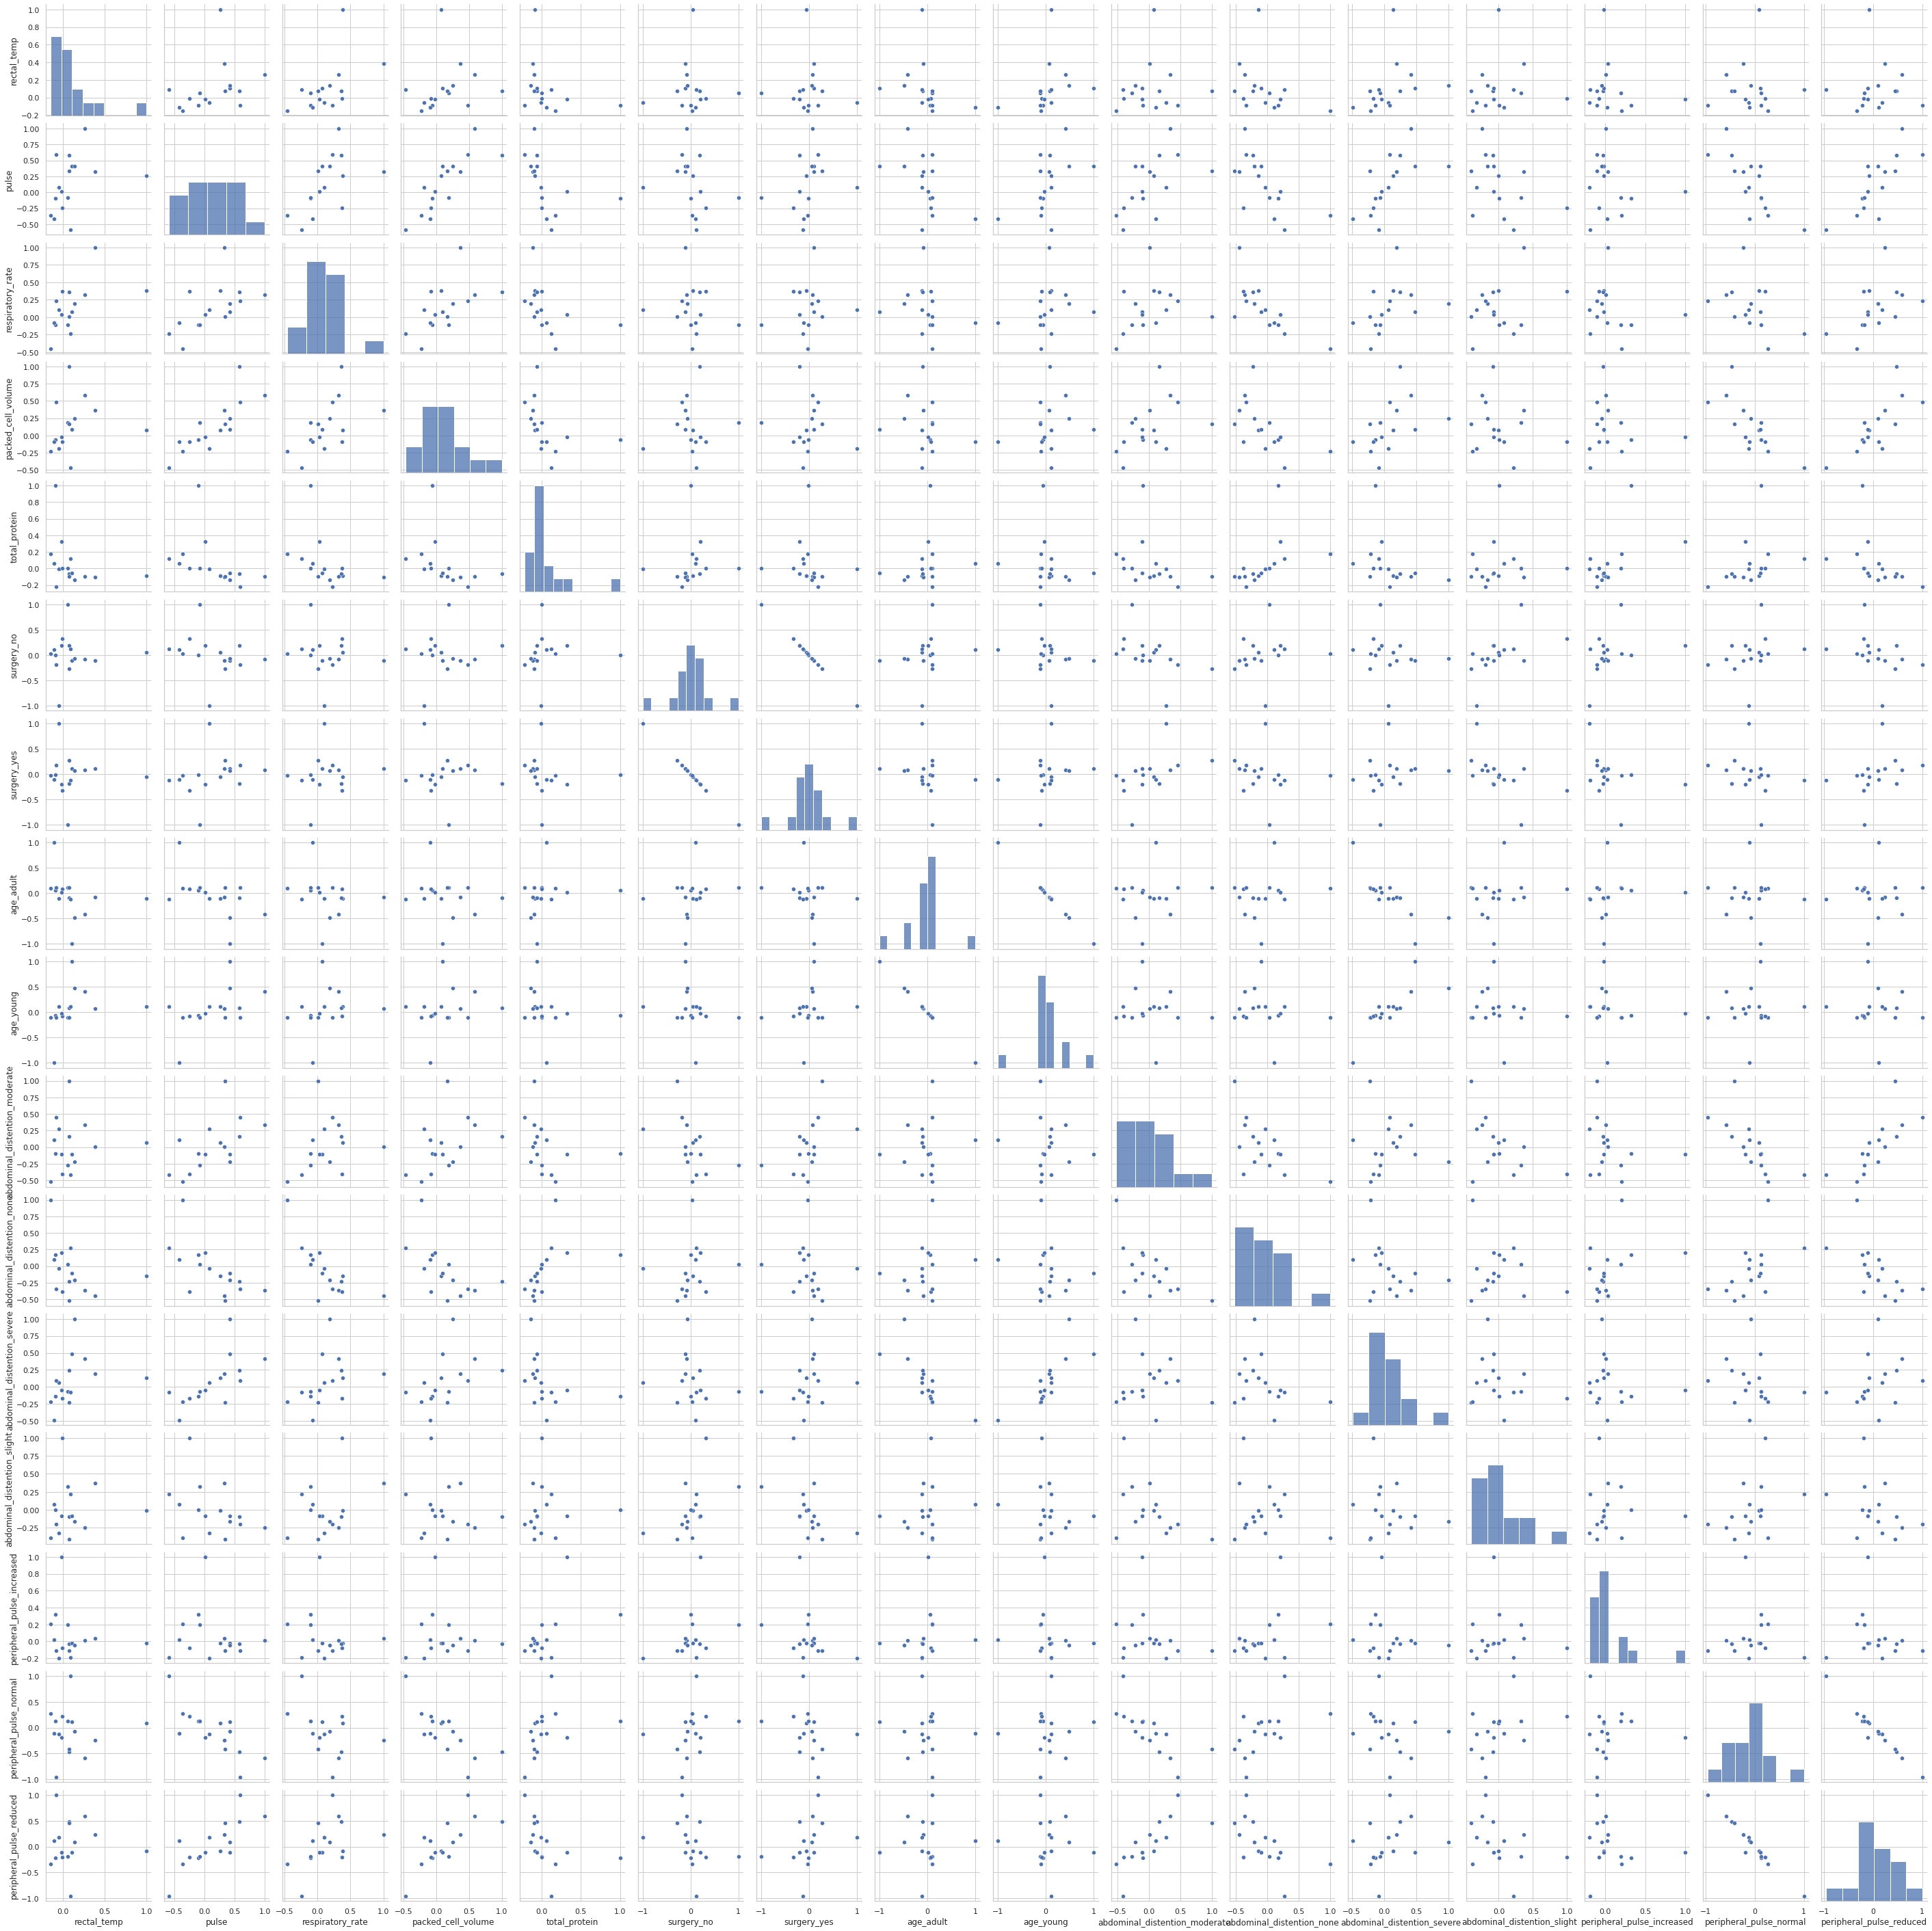

In [4]:
Selected_features = ['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein', 
                     'surgery_no', 'surgery_yes', 'age_adult','age_young','abdominal_distention_moderate',
                     'abdominal_distention_none','abdominal_distention_severe','abdominal_distention_slight',
                    'peripheral_pulse_increased','peripheral_pulse_normal','peripheral_pulse_reduced']
#Calculation parameters
X = data2[Selected_features]
#Result for the calculation
y = data2['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train.shape
data2.outcome.describe()
(data2.outcome == 0).sum()
sns.pairplot(data2[Selected_features].corr())

plt.show()

Проаналізуйте точність побудованих класифікаторів.

In [5]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', max_iter=10000)
clf = clf.fit(X_train, y_train)
moonsY_pred = clf.predict(X_test)
log_regr_score1 = clf.score(X_test, y_test)
print('log_regr_score: ',log_regr_score1)
confusion_matrix(y_test, moonsY_pred)

log_regr_score:  0.8333333333333334


array([[ 0,  0],
       [ 2, 10]])

In [6]:
clf = DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train, y_train)
moonsY_pred = clf.predict(X_test)
dec_tree_score1 = clf.score(X_test, y_test)
print('dec_tree_score: ',dec_tree_score1)
confusion_matrix(y_test, moonsY_pred)

dec_tree_score:  0.5


array([[0, 0],
       [6, 6]])

In [7]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf = clf.fit(X_train, y_train)
moonsY_pred = clf.predict(X_test)
rand_frst_score1 = clf.score(X_test, y_test)
print('random_forest_score: ',rand_frst_score1)
confusion_matrix(y_test, moonsY_pred)

random_forest_score:  0.8333333333333334


array([[ 0,  0],
       [ 2, 10]])

In [8]:
clf = KNeighborsClassifier(n_neighbors=3)
clf = clf.fit(X_train, y_train)
moonsY_pred = clf.predict(X_test)
KNbrs_score1 = clf.score(X_test, y_test)
print('KNbrs_score: ',KNbrs_score1)
confusion_matrix(y_test, moonsY_pred)

KNbrs_score:  0.8333333333333334


array([[ 0,  0],
       [ 2, 10]])

In [9]:
clf = SVC(gamma='auto')
clf = clf.fit(X_train, y_train)
moonsY_pred = clf.predict(X_test)
SVM_score1 = clf.score(X_test, y_test)
print('SVM_score: ',SVM_score1)
confusion_matrix(y_test, moonsY_pred)

SVM_score:  1.0


array([[12]])

In [10]:
clf = GaussianNB()
clf = clf.fit(X_train, y_train)
moonsY_pred = clf.predict(X_test)
NB_score1 = clf.score(X_test, y_test)
print('NB_score ',NB_score1)
confusion_matrix(y_test, moonsY_pred)

NB_score  0.9166666666666666


array([[ 0,  0],
       [ 1, 11]])